In [2]:
import pandas as pd
import matplotlib.pyplot as plt
heart = pd.read_csv("Heart.csv")
print(heart.head())
'''
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
'''

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope  Ca        Thal  AHD  
0      0      2.3      3   0       fixed   No  
1      1      1.5      2   3      normal  Yes  
2      1      2.6      2   2  reversable  Yes  
3      0      3.5      3   0      normal   No  
4      0      1.4      1   0      normal   No  


'\nage\nsex\nchest pain type (4 values)\nresting blood pressure\nserum cholestoral in mg/dl\nfasting blood sugar > 120 mg/dl\nresting electrocardiographic results (values 0,1,2)\nmaximum heart rate achieved\nexercise induced angina\noldpeak = ST depression induced by exercise relative to rest\nthe slope of the peak exercise ST segment\nnumber of major vessels (0-3) colored by flourosopy\nthal: 0 = normal; 1 = fixed defect; 2 = reversable defect\n'

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0,0,0
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3,1,1
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2,2,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0,1,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0,1,0


In [4]:
feature_cols = ['Age','Sex', 'ChestPain', 'RestBP','Chol','Fbs','RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal']
x = heart[feature_cols]
y = heart.AHD
print(x)

     Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0     63    1          3     145   233    1        2    150      0      2.3   
1     67    1          0     160   286    0        2    108      1      1.5   
2     67    1          0     120   229    0        2    129      1      2.6   
3     37    1          1     130   250    0        0    187      0      3.5   
4     41    0          2     130   204    0        2    172      0      1.4   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
298   45    1          3     110   264    0        0    132      0      1.2   
299   68    1          0     144   193    1        0    141      0      3.4   
300   57    1          0     130   131    0        0    115      1      1.2   
301   57    0          2     130   236    0        2    174      0      0.0   
302   38    1          1     138   175    0        0    173      0      0.0   

     Slope  Ca  Thal  
0        3   0     0  
1    

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=955)


In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred=logreg.predict(x_test)

print("Predicted Test Results :", y_pred)



Predicted Test Results : [0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1
 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
#TP FP
#FN TN

array([[46,  5],
       [ 9, 31]], dtype=int64)

In [8]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
#precision = (TP) / (TP+FP)
print("Precision: ", metrics.precision_score(y_test, y_pred))
#recall = (TP) / (TP+FN)
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.8461538461538461
Precision:  0.8611111111111112
Recall:  0.775


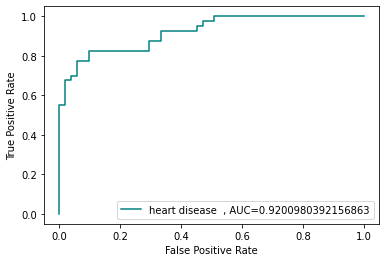

In [9]:
"""
ROC - Receiver Operating Characteristic curve is a plot of the true positive rate againt the false positive rate.
It shows the tradeoff between sensitivity and specificity

The predict method is used to predict the actual class while predict_proba method
can be used to infer the class probabilities

AUC score for our case is 0.92
1 represents perfect classifier
0.5 represents a worthless classifier 
"""


y_pred_p = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_p)
auc = metrics.roc_auc_score(y_test, y_pred_p)
plt.plot(fpr,tpr, label ="heart disease  , AUC="+str(auc),color="teal")
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()